In [1]:
!which python

/Users/saiha/opt/anaconda3/envs/churn-model/bin/python


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#standard imports
import os
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from src.localpath import RAW_DATA_PATH
from src.data.make_dataset import load_training_data
from src.localpath import *

In [4]:
#Configuration for Jupyter Notebooks
pd.options.display.max_columns=100
pd.options.display.max_rows=100

## Load Featurized  Data

In [5]:
X_train,y_train=load_training_data(final=True)

In [6]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,7,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,0,1,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,29,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,0,0,0,3,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Feature Correlations

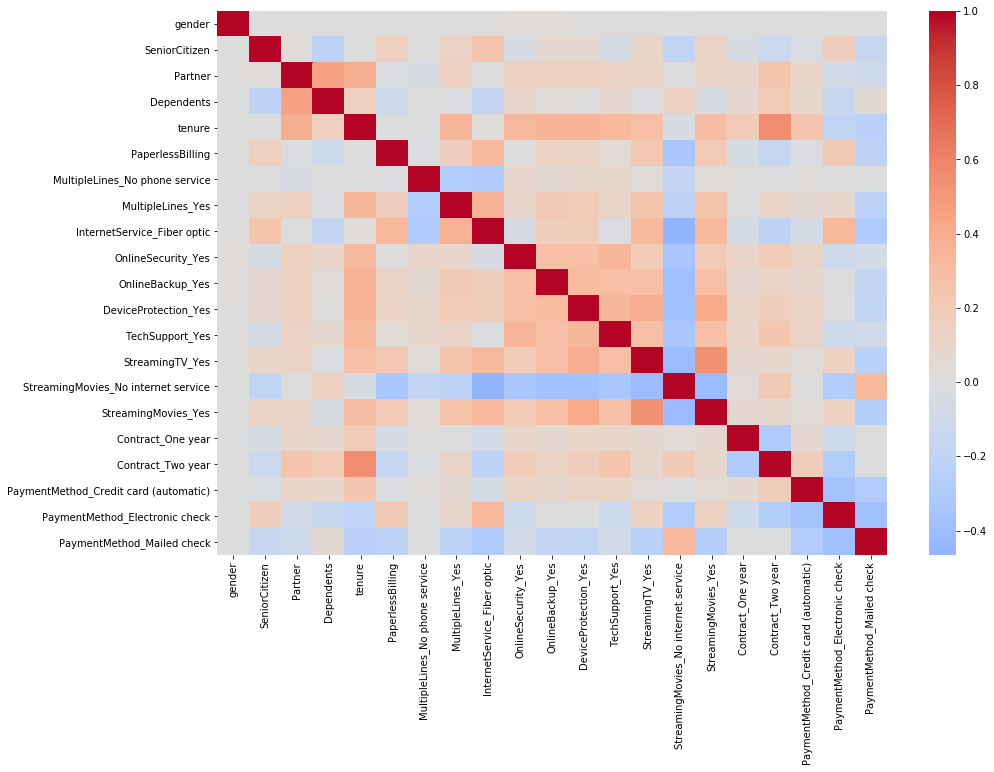

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),center=0,cmap='coolwarm',yticklabels=True,xticklabels=True)
plt.savefig(REPORTS_DIRECTORY + '/heatmap.png')

In [75]:
correlations=X_train.corr()

In [76]:
correlations=correlations.unstack().reset_index()

In [77]:
correlations


,level_0,level_1,0
0,gender,gender,1.000000
1,gender,SeniorCitizen,0.005691
2,gender,Partner,0.010143
3,gender,Dependents,-0.011058
4,gender,tenure,-0.001318
...,...,...,...
895,PaymentMethod_Mailed check,Contract_One year,0.008235
896,PaymentMethod_Mailed check,Contract_Two year,-0.011466
897,PaymentMethod_Mailed check,PaymentMethod_Credit card (automatic),-0.285035
898,PaymentMethod_Mailed check,PaymentMethod_Electronic check,-0.387231


In [80]:
correlations=correlations[correlations["level_0"] <correlations["level_1"]]

In [87]:
correlations.sort_values(by=0,ascending=False).head(100)

,level_0,level_1,0
463,OnlineBackup_No internet service,OnlineSecurity_No internet service,1.000000
709,StreamingMovies_No internet service,TechSupport_No internet service,1.000000
413,OnlineSecurity_No internet service,StreamingMovies_No internet service,1.000000
411,OnlineSecurity_No internet service,StreamingTV_No internet service,1.000000
409,OnlineSecurity_No internet service,TechSupport_No internet service,1.000000
533,DeviceProtection_No internet service,StreamingMovies_No internet service,1.000000
531,DeviceProtection_No internet service,StreamingTV_No internet service,1.000000
529,DeviceProtection_No internet service,TechSupport_No internet service,1.000000
525,DeviceProtection_No internet service,OnlineBackup_No internet service,1.000000
523,DeviceProtection_No internet service,OnlineSecurity_No internet service,1.000000


In [88]:
sorted(correlations.values,key=lambda x:abs(x[2]),reverse=True)

[array(['MultipleLines_No phone service', 'PhoneService', -1.0],
       dtype=object),
 array(['InternetService_No', 'OnlineSecurity_No internet service', 1.0],
       dtype=object),
 array(['InternetService_No', 'OnlineBackup_No internet service', 1.0],
       dtype=object),
 array(['InternetService_No', 'TechSupport_No internet service', 1.0],
       dtype=object),
 array(['InternetService_No', 'StreamingTV_No internet service', 1.0],
       dtype=object),
 array(['InternetService_No', 'StreamingMovies_No internet service', 1.0],
       dtype=object),
 array(['OnlineSecurity_No internet service',
        'TechSupport_No internet service', 1.0], dtype=object),
 array(['OnlineSecurity_No internet service',
        'StreamingTV_No internet service', 1.0], dtype=object),
 array(['OnlineSecurity_No internet service',
        'StreamingMovies_No internet service', 1.0], dtype=object),
 array(['OnlineBackup_No internet service',
        'OnlineSecurity_No internet service', 1.0], dtype=obje

## Look at feature correlations with churn

In [95]:
X_train.assign(**y_train).corr()[["Churn"]].sort_values(by="Churn",ascending=False)

,Churn
Churn,1.000000
InternetService_Fiber optic,0.300112
PaymentMethod_Electronic check,0.294180
PaperlessBilling,0.188793
MonthlyCharges,0.186615
SeniorCitizen,0.146549
StreamingMovies_Yes,0.060152
StreamingTV_Yes,0.054414
MultipleLines_Yes,0.033019
gender,0.011997
